In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans

In [4]:
data = pd.read_csv("data/song_data.csv")

In [5]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [131]:
kmeans = MiniBatchKMeans(n_clusters=75)

In [132]:
kmeans.fit(data.drop(['song_name','song_popularity','song_duration_ms','key','loudness','audio_mode','tempo','time_signature'],axis=1))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=75, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [133]:
kmeans.cluster_centers_

array([[5.31830508e-01, 7.59033898e-01, 2.43664407e-01, 2.82199322e-01,
        1.24010169e-01, 4.14994915e-01, 3.46498305e-01],
       [6.47650008e-02, 5.59041254e-01, 6.34217822e-01, 1.23083920e-02,
        1.15521617e-01, 6.31490099e-02, 4.76676568e-01],
       [5.07833333e-01, 7.82414815e-01, 5.03718519e-01, 1.30791424e-02,
        1.22777407e-01, 1.58022593e-01, 4.27644444e-01],
       [4.21176353e-01, 7.80062124e-01, 7.60374749e-01, 3.50961515e-03,
        1.08139880e-01, 6.95901804e-02, 8.76815631e-01],
       [2.31960163e-01, 6.01766938e-01, 8.00813008e-01, 3.98011531e-03,
        1.33832791e-01, 7.84230352e-02, 8.68002710e-01],
       [7.11984047e-02, 7.81364063e-01, 5.81678125e-01, 4.92355225e-03,
        1.27214219e-01, 9.38476563e-02, 2.45587656e-01],
       [1.94035920e-02, 5.23925926e-01, 9.03588694e-01, 2.23617591e-02,
        3.13009162e-01, 8.01426901e-02, 4.09446394e-01],
       [8.36718310e-01, 6.68995305e-01, 3.05328216e-01, 7.93483568e-01,
        1.43521127e-01, 1

In [134]:
info = pd.read_csv("data/song_info.csv")

In [135]:
info.groupby("playlist").nunique()

,song_name,artist_name,album_names,playlist
playlist,,,,
00s Rock Anthems,60,52,57,1
100% LatinX,59,57,59,1
2000s Smash Hits,80,41,66,1
50 Latin Classics,50,49,49,1
60s Rock Anthems,100,62,92,1
...,...,...,...,...
Workout Twerkout,49,38,47,1
You & Me,100,79,86,1
Young & Free,100,91,100,1


In [136]:
df = data.to_numpy()

In [137]:
df[:,1]

array([73, 66, 76, ..., 23, 55, 60], dtype=object)

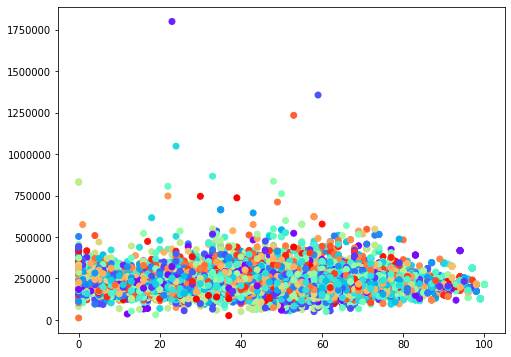

In [138]:
plt.figure(figsize=(8, 6))
plt.scatter(df[:,1], df[:,2], c=kmeans.labels_, cmap='rainbow')

In [139]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans.labels_

In [140]:
combined_data = data.join(info.drop("song_name",axis=1)).join(cluster_map.drop("data_index",axis=1)).drop_duplicates(subset=['song_name',"artist_name","song_duration_ms"],keep="last")

In [141]:
combined_data[combined_data.cluster == 50].describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,44.270833,225492.291667,0.554292,0.518479,0.470104,0.391729,5.020833,0.145604,-10.457437,0.604167,0.062598,122.402542,3.916667,0.203679,50.0
std,17.946421,60051.723772,0.152962,0.140791,0.114721,0.120773,3.417661,0.094392,2.570101,0.494204,0.060500,27.661726,0.347228,0.121070,0.0
min,0.000000,86709.000000,0.277000,0.161000,0.253000,0.187000,0.000000,0.064400,-15.605000,0.000000,0.024900,77.703000,3.000000,0.030100,50.0
25%,38.750000,197693.250000,0.438000,0.443000,0.402250,0.292000,2.000000,0.094100,-12.212000,0.000000,0.031925,97.481250,4.000000,0.090275,50.0
50%,48.000000,227229.500000,0.527000,0.534000,0.462500,0.377000,5.000000,0.111000,-10.767000,1.000000,0.039600,121.975500,4.000000,0.217000,50.0
75%,56.000000,267209.750000,0.667000,0.618250,0.520750,0.495500,8.000000,0.139500,-8.978250,1.000000,0.060375,140.064500,4.000000,0.295000,50.0
max,71.000000,369306.000000,0.924000,0.775000,0.804000,0.651000,11.000000,0.457000,-4.991000,1.000000,0.361000,174.639000,5.000000,0.439000,50.0


In [142]:
combined_data[combined_data.cluster == 50].sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,cluster
9515,Olalla,71,247373,0.662,0.572,0.409,0.296,3,0.1250,-11.384,1,0.0377,129.983,4,0.3510,Blanco White,Olalla,Infinite Acoustic,50
18745,My Arms Were Always Around You,70,200800,0.724,0.643,0.436,0.459,1,0.1100,-12.245,1,0.0273,91.485,4,0.4220,Peter Bradley Adams,My Arms Were Always Around You,Your Favorite Coffeehouse,50
18757,Love Brought Weight,68,185746,0.699,0.367,0.326,0.358,7,0.0759,-15.605,1,0.0344,116.659,4,0.0640,Old Sea Brigade,Old Sea Brigade,Your Favorite Coffeehouse,50
301,Nights In White Satin - Single Version / Mono Mix,66,269106,0.465,0.195,0.483,0.497,4,0.0686,-4.991,0,0.0300,84.710,4,0.1730,The Moody Blues,Days Of Future Passed (Deluxe Version),60s Rock Anthems,50
14707,Baby,63,287426,0.435,0.622,0.253,0.471,2,0.0941,-14.360,1,0.0331,92.584,4,0.3360,Ariel Pink,Mature Themes,Retro Pop,50
2609,Limit To Your Love,61,276720,0.549,0.775,0.281,0.242,10,0.0941,-10.216,0,0.0960,139.951,4,0.0398,James Blake,James Blake,Alternative 10s,50
16600,Yeah Right,61,174357,0.624,0.672,0.590,0.236,1,0.0991,-9.574,1,0.1290,169.036,4,0.2100,Joji,Yeah Right,Tender,50
1448,Sweet Child O' Mine,61,302880,0.747,0.544,0.479,0.310,3,0.0808,-10.878,1,0.0279,118.117,4,0.4340,Taken By Trees,Sweet Child o’ Mine,Acoustic Covers,50
13454,Queens,59,234680,0.690,0.617,0.589,0.268,2,0.0958,-12.767,1,0.0457,125.058,4,0.0301,The Blaze,Dancehall,POLLEN,50
18691,Evening Buffalo,58,156342,0.636,0.647,0.618,0.517,10,0.1140,-7.102,1,0.0597,87.457,4,0.2280,Felix Snow,Evening Buffalo,Young & Free,50


In [143]:
shotgun_georgeezra_cluster = kmeans.predict([[0.286,0.672,0.735,0.000000,0.242,0.0457,0.754]])
shotgun_georgeezra_cluster

array([73])

In [144]:
combined_data[combined_data.cluster == shotgun_georgeezra_cluster[0]].sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,cluster
18177,Shotgun,93,201287,0.286,0.672,0.735,0.000000,5,0.242,-4.733,1,0.0457,115.741,4,0.754,George Ezra,Staying at Tamara's,Weekend Hangouts,73
17827,Clandestino,91,231920,0.390,0.766,0.822,0.000034,1,0.349,-4.126,0,0.1600,165.842,4,0.881,Shakira,Clandestino,Viva Latino,73
17818,Mala Mía,91,183752,0.310,0.749,0.752,0.000000,6,0.232,-4.883,1,0.3450,180.049,4,0.901,Maluma,Mala Mía,Viva Latino,73
17821,Celoso,87,179693,0.352,0.746,0.703,0.000000,4,0.331,-4.179,0,0.1070,166.043,4,0.667,Lele Pons,Celoso,Viva Latino,73
7695,O Bebê,84,178099,0.248,0.810,0.749,0.000000,6,0.241,-3.734,0,0.1140,165.057,4,0.795,MC Kevinho,O Bebê,Global X,73
17342,Hips Don't Lie,84,218093,0.284,0.778,0.824,0.000000,10,0.405,-5.892,0,0.0712,100.024,4,0.756,Shakira,Oral Fixation Vol. 2,Throwback_ Latin Explosion,73
11345,All Falls Down (feat. Juliander),83,199111,0.303,0.658,0.678,0.000000,1,0.361,-4.407,1,0.0580,97.976,4,0.662,Alan Walker,All Falls Down (feat. Juliander),Mega Hit Mix,73
10263,Felices los 4,82,230000,0.213,0.766,0.756,0.000000,5,0.349,-5.861,1,0.1320,94.027,4,0.716,Maluma,F.A.M.E.,Latin Party Anthems,73
18292,Bang Bang,79,199386,0.260,0.706,0.786,0.000000,0,0.380,-3.417,0,0.0909,150.035,4,0.749,Jessie J,Sweet Talker (Deluxe Version),Women of Pop,73
14463,100 Miles and Running (ft. Wale & John Lindahl),78,353453,0.556,0.844,0.935,0.000000,7,0.420,-3.585,1,0.0641,118.999,4,0.958,Logic,YSIV,Rep The Set,73
